In [1]:
!pip install pgmpy
from pgmpy.models import BayesianNetwork
import networkx as nx
import matplotlib.pyplot as plt
from IPython.display import Image, display

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 18.7 MB/s eta 0:00:00


First few rows of the dataset:
        Date  Oil Company Stock Price (Close)  Interest Rate (Close)  \
0 2014-10-03                        93.919998                  0.010   
1 2014-10-06                        94.519997                  0.010   
2 2014-10-07                        93.370003                  0.010   
3 2014-10-08                        94.610001                  0.005   
4 2014-10-09                        91.820000                  0.005   

   Stock Market (Close)  Oil Industry (Close)  
0           1967.900024             89.739998  
1           1964.819946             90.339996  
2           1935.099976             88.849998  
3           1968.890015             87.309998  
4           1928.209961             85.769997  


  0%|          | 0/1000000 [00:00<?, ?it/s]

Learned structure (edges): [('Interest Rate (Close)', 'Oil Company Stock Price (Close)'), ('Stock Market (Close)', 'Oil Industry (Close)'), ('Stock Market (Close)', 'Interest Rate (Close)'), ('Stock Market (Close)', 'Oil Company Stock Price (Close)'), ('Oil Industry (Close)', 'Interest Rate (Close)'), ('Oil Industry (Close)', 'Oil Company Stock Price (Close)')]
('Interest Rate (Close)', 'Oil Company Stock Price (Close)')
('Stock Market (Close)', 'Oil Industry (Close)')
('Stock Market (Close)', 'Interest Rate (Close)')
('Stock Market (Close)', 'Oil Company Stock Price (Close)')
('Oil Industry (Close)', 'Interest Rate (Close)')
('Oil Industry (Close)', 'Oil Company Stock Price (Close)')


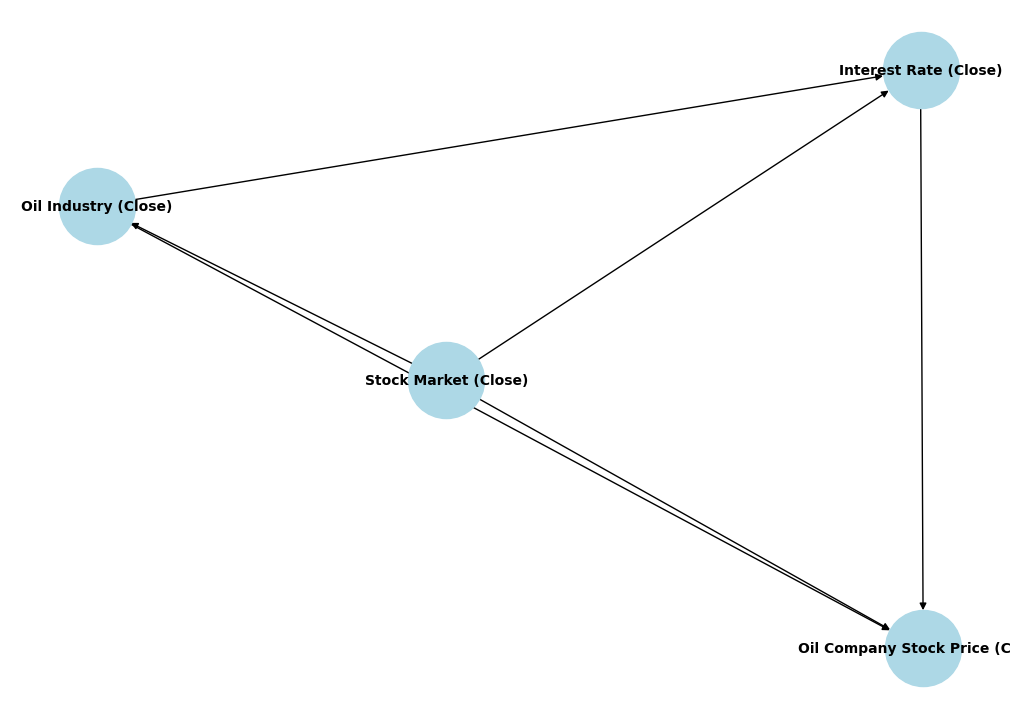

In [7]:
import pandas as pd
from pgmpy.estimators import HillClimbSearch, BicScore
from pgmpy.models import BayesianNetwork
from sklearn.preprocessing import KBinsDiscretizer
import matplotlib.pyplot as plt
import networkx as nx
from pgmpy.inference import VariableElimination


file_path = '/content/oil_company_data_last_10_years.xlsx'
data = pd.read_excel(file_path)

print("First few rows of the dataset:")
print(data.head())

data = data.sample(n=1000, random_state=42)

discretizer = KBinsDiscretizer(n_bins=2, encode='ordinal', strategy='uniform')
data[['Oil Company Stock Price (Close)', 'Interest Rate (Close)', 'Stock Market (Close)', 'Oil Industry (Close)']] = discretizer.fit_transform(
    data[['Oil Company Stock Price (Close)', 'Interest Rate (Close)', 'Stock Market (Close)', 'Oil Industry (Close)']])

hc = HillClimbSearch(data)
best_model = hc.estimate(scoring_method=BicScore(data))

print("Learned structure (edges):", best_model.edges())

model = BayesianNetwork(best_model.edges())


for edge in best_model.edges():
    print(edge)

# Optionally, you can visualize the network
nx_graph = nx.DiGraph(best_model.edges())
plt.figure(figsize=(10, 7))
nx.draw(nx_graph, with_labels=True, node_size=3000, node_color="lightblue", font_size=10, font_weight='bold')
plt.show()




First few rows of the dataset:
   Timestamp  Share Price (USD)  Revenue (USD)  EBITDA (USD)  \
0 2020-07-01         197.268234   168088000000   85134000000   
1 2020-07-02         198.771561   168088000000   85134000000   
2 2020-07-06         203.050369   168088000000   85134000000   
3 2020-07-07         200.689331   168088000000   85134000000   
4 2020-07-08         205.103043   168088000000   85134000000   

   Net Income (USD)  Market Cap (USD)  Operating Income (USD)  \
0       61271000000     3127005675520             69916000000   
1       61271000000     3127005675520             69916000000   
2       61271000000     3127005675520             69916000000   
3       61271000000     3127005675520             69916000000   
4       61271000000     3127005675520             69916000000   

   Free Cash Flow (USD)  Total Assets (USD)  Inflation Rate (%)  
0           56118000000        333779000000          118.690502  
1           56118000000        333779000000          118.6905

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:263: UserWarning: Feature 4 is constant and will be replaced with 0.
  warnings.warn(


  0%|          | 0/1000000 [00:00<?, ?it/s]

Learned structure (edges): [('Share Price (USD)', 'Operating Income (USD)'), ('Share Price (USD)', 'Inflation Rate (%)'), ('Share Price (USD)', 'Revenue (USD)'), ('Share Price (USD)', 'Free Cash Flow (USD)'), ('Revenue (USD)', 'Inflation Rate (%)'), ('EBITDA (USD)', 'Net Income (USD)'), ('EBITDA (USD)', 'Total Assets (USD)'), ('Net Income (USD)', 'Free Cash Flow (USD)'), ('Operating Income (USD)', 'EBITDA (USD)'), ('Operating Income (USD)', 'Revenue (USD)'), ('Free Cash Flow (USD)', 'Revenue (USD)'), ('Free Cash Flow (USD)', 'Inflation Rate (%)')]
('Share Price (USD)', 'Operating Income (USD)')
('Share Price (USD)', 'Inflation Rate (%)')
('Share Price (USD)', 'Revenue (USD)')
('Share Price (USD)', 'Free Cash Flow (USD)')
('Revenue (USD)', 'Inflation Rate (%)')
('EBITDA (USD)', 'Net Income (USD)')
('EBITDA (USD)', 'Total Assets (USD)')
('Net Income (USD)', 'Free Cash Flow (USD)')
('Operating Income (USD)', 'EBITDA (USD)')
('Operating Income (USD)', 'Revenue (USD)')
('Free Cash Flow (USD

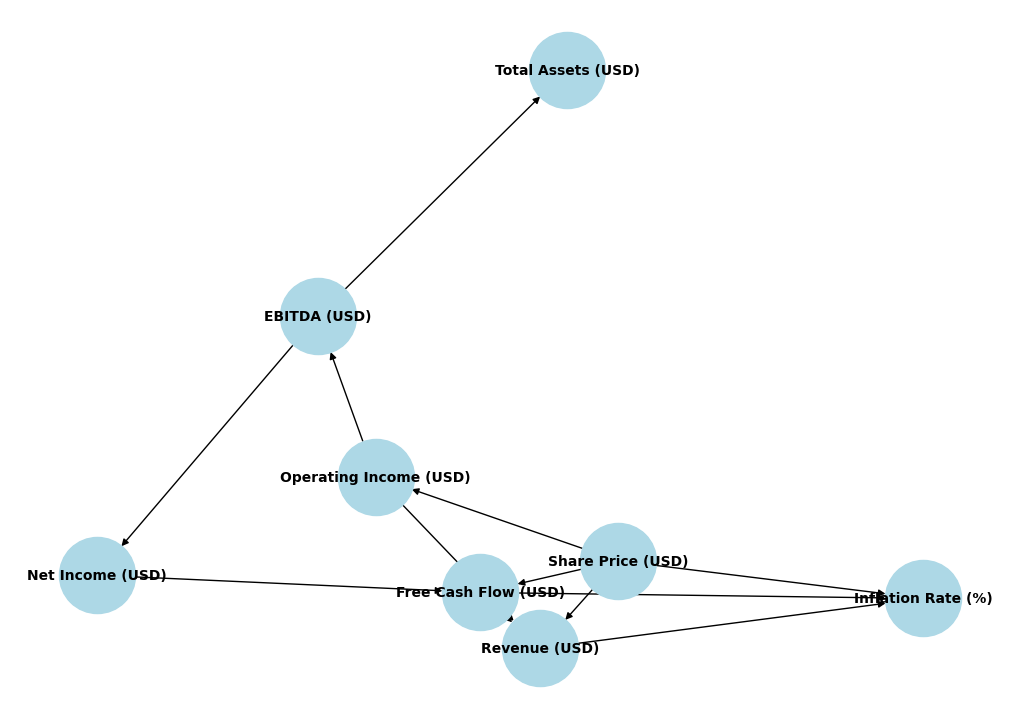

In [3]:
import pandas as pd
from pgmpy.estimators import HillClimbSearch, BicScore
from pgmpy.models import BayesianNetwork
from sklearn.preprocessing import KBinsDiscretizer
import matplotlib.pyplot as plt
import networkx as nx

# Read the Excel file containing your data
file_path = '/content/Microsoft_10_year_data_2024-10-02_09-22-31.xlsx'  # Replace with the actual path to your file
data = pd.read_excel(file_path)

print("First few rows of the dataset:")
print(data.head())

# Selecting the relevant columns for discretization
columns_to_discretize = [
    'Share Price (USD)', 'Revenue (USD)', 'EBITDA (USD)', 'Net Income (USD)',
    'Market Cap (USD)', 'Operating Income (USD)', 'Free Cash Flow (USD)',
    'Total Assets (USD)', 'Inflation Rate (%)'
]

# Discretizing the numerical columns
discretizer = KBinsDiscretizer(n_bins=2, encode='ordinal', strategy='uniform')
data[columns_to_discretize] = discretizer.fit_transform(data[columns_to_discretize])

# Learn the structure using HillClimbSearch
hc = HillClimbSearch(data)
best_model = hc.estimate(scoring_method=BicScore(data))

print("Learned structure (edges):", best_model.edges())

# Create a Bayesian network from the learned structure
model = BayesianNetwork(best_model.edges())

# Display edges of the learned network
for edge in best_model.edges():
    print(edge)

# Optionally, you can visualize the network
nx_graph = nx.DiGraph(best_model.edges())
plt.figure(figsize=(10, 7))
nx.draw(nx_graph, with_labels=True, node_size=3000, node_color="lightblue", font_size=10, font_weight='bold')
plt.show()


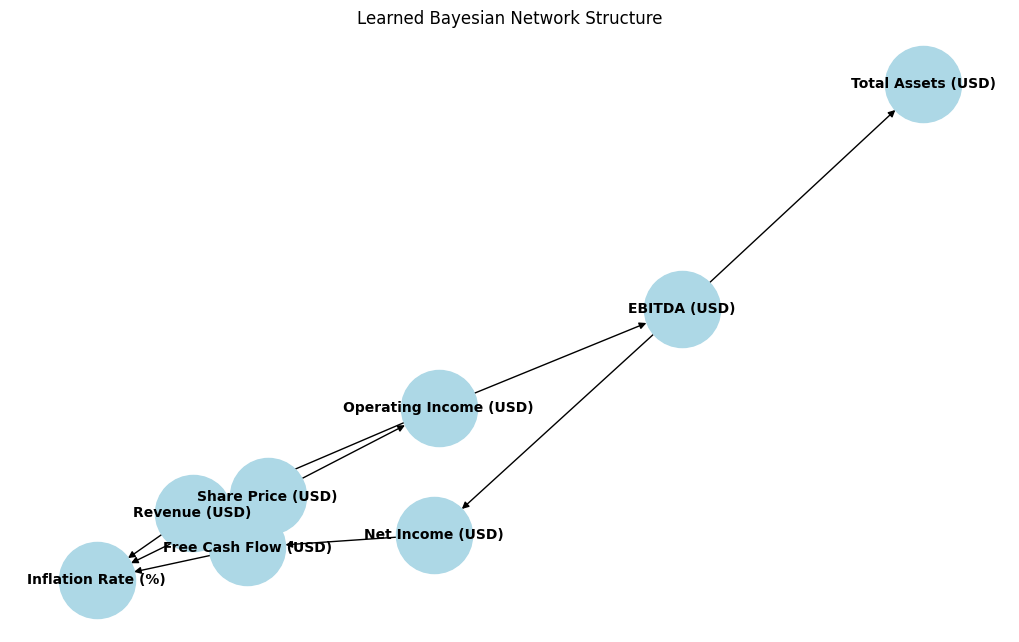

In [4]:
import matplotlib.pyplot as plt
import networkx as nx
from pgmpy.models import BayesianNetwork


edges = best_model.edges()
model = BayesianNetwork(edges)


G = nx.DiGraph()


G.add_edges_from(edges)


plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="lightblue", font_size=10, font_weight="bold", arrows=True)
plt.title("Learned Bayesian Network Structure")
plt.show()

CPD of Share Price (USD):
[0.72039801 0.27960199]


CPD of Operating Income (USD):
Values:
['Operating Income (USD)', 'Share Price (USD)']: [0.96546961 0.19928826]
['Operating Income (USD)', 'Share Price (USD)']: [0.03453039 0.80071174]


CPD of Inflation Rate (%):
Values:
['Inflation Rate (%)', 'Free Cash Flow (USD)', 'Revenue (USD)', 'Share Price (USD)']: [[[1.         0.5       ]
  [0.         0.        ]]

 [[0.52054795 1.        ]
  [0.         0.        ]]]
['Inflation Rate (%)', 'Free Cash Flow (USD)', 'Revenue (USD)', 'Share Price (USD)']: [[[0.         0.5       ]
  [1.         1.        ]]

 [[0.47945205 0.        ]
  [1.         1.        ]]]


CPD of Revenue (USD):
Values:
['Revenue (USD)', 'Free Cash Flow (USD)', 'Operating Income (USD)', 'Share Price (USD)']: [[[0.525 0.   ]
  [0.5   0.5  ]]

 [[1.    1.   ]
  [0.    0.   ]]]
['Revenue (USD)', 'Free Cash Flow (USD)', 'Operating Income (USD)', 'Share Price (USD)']: [[[0.475 1.   ]
  [0.5   0.5  ]]

 [[0.    0.   ]
  [1.   

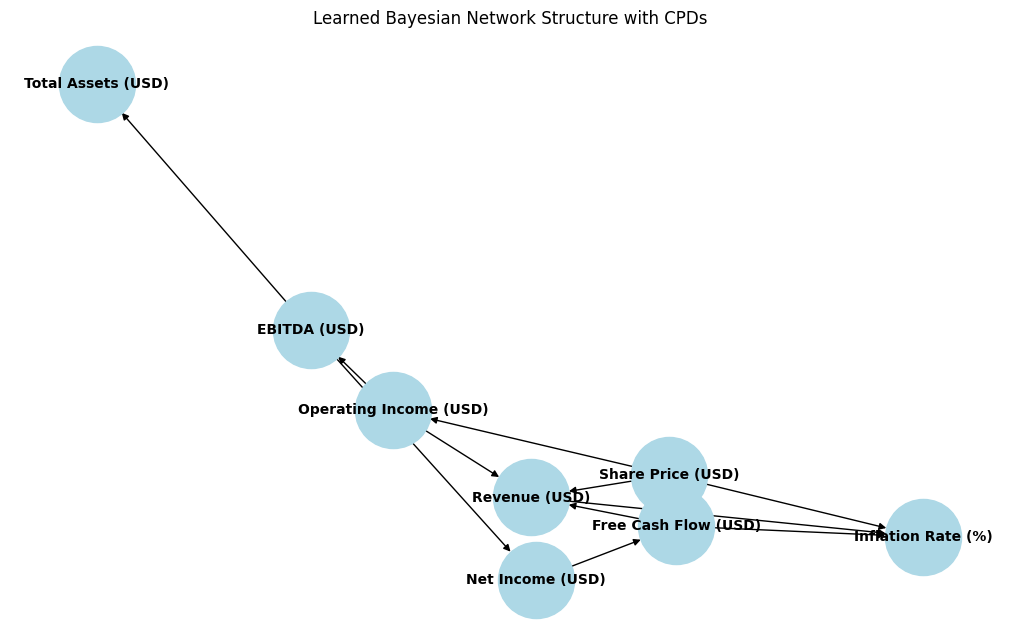

In [5]:
from pgmpy.estimators import MaximumLikelihoodEstimator
# Fit the model to the data to estimate CPDs
model.fit(data, estimator=MaximumLikelihoodEstimator)

# Print CPDs in a simplified manner
for cpd in model.get_cpds():
    cp_values = cpd.values
    cp_variables = cpd.variables

    print(f"CPD of {cpd.variable}:")

    # If the CPD is multi-dimensional, display each dimension
    if len(cp_values.shape) > 1:
        print("Values:")
        for idx in range(cp_values.shape[0]):
            print(f"{cp_variables}: {cp_values[idx]}")
    else:
        print(cp_values)

    print("\n")

# Visualize the Bayesian Network structure again for reference
import matplotlib.pyplot as plt
import networkx as nx

# Create a directed graph for visualization
G = nx.DiGraph()

# Add nodes and edges to the graph
G.add_edges_from(edges)

# Draw the graph
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G)  # positions for all nodes
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="lightblue", font_size=10, font_weight="bold", arrows=True)
plt.title("Learned Bayesian Network Structure with CPDs")
plt.show()